# Pendulum Predictions via ARIMA


In [1]:
from pathlib import Path
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

parent_dir = Path(os.getcwd()).parent
sys.path.append(str(parent_dir / "src" / "pendulum"))

from utils import generate_data


## Data Generation


In [2]:
df = generate_data(config_dir=parent_dir / "config")
df


,theta,theta_dot,x,y,time_step,energy_kinetic_single,energy_potential_single,energy_total_single,q,p,...,energy_potential_double,energy_total_double,q1,q2,p1,p2,dq1dt,dq2dt,dp1dt,dp2dt
0,1.396263,0.000000,0.984808,-0.173648,0.0,0.000000,12.147372,12.147372,1.396263,0.000000,...,63.494744,63.494744,1.047198,1.396263,0.000000,0.000000,0.000000,0.000000,-29.704671,-28.953348
1,1.348080,-0.962153,0.975301,-0.220880,0.1,0.694304,11.453068,12.147372,1.348080,-1.443229,...,62.189528,63.494744,1.014286,1.384610,-2.945776,-2.898791,-0.649418,-0.240580,-28.954613,-29.061526
2,1.204570,-1.901356,0.933685,-0.358095,0.2,2.711367,9.436005,12.147372,1.204570,-2.852035,...,58.416620,63.494744,0.920823,1.345207,-5.733228,-5.823077,-1.193819,-0.568738,-26.467501,-29.493798
3,0.970103,-2.770324,0.824944,-0.565214,0.3,5.756020,6.391352,12.147372,0.970103,-4.155486,...,52.588175,63.494744,0.782267,1.265667,-8.169643,-8.810857,-1.536581,-1.050956,-21.925949,-30.293712
4,0.655675,-3.483127,0.609694,-0.792637,0.4,9.099130,3.048241,12.147372,0.655675,-5.224691,...,45.327099,63.494745,0.622830,1.129263,-10.071266,-11.865790,-1.600384,-1.703839,-16.040448,-30.548457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,-1.262497,-1.594961,-0.952851,-0.303439,199.6,1.907926,10.239452,12.147378,-1.262497,-2.392442,...,29.128894,63.494655,-0.546641,0.378465,-10.824978,-16.799798,-1.471815,-3.142845,28.913218,-21.946514
1997,-1.374697,-0.644559,-0.980834,-0.194845,199.7,0.311592,11.835785,12.147378,-1.374697,-0.966839,...,27.993179,63.494655,-0.597444,0.010466,-8.522245,-17.788781,0.563223,-4.261274,15.182423,3.804697
1998,-1.390969,0.319604,-0.983875,-0.178859,199.8,0.076610,12.070768,12.147378,-1.390969,0.479406,...,28.483185,63.494655,-0.428857,-0.480344,-7.356194,-16.573050,2.443281,-5.309596,16.265951,11.582374
1999,-1.310978,1.277436,-0.966437,-0.256905,199.9,1.223881,10.923496,12.147378,-1.310978,1.916154,...,35.401138,63.494654,-0.243236,-0.951795,-5.377473,-15.525307,1.057315,-3.985281,16.487036,15.719007


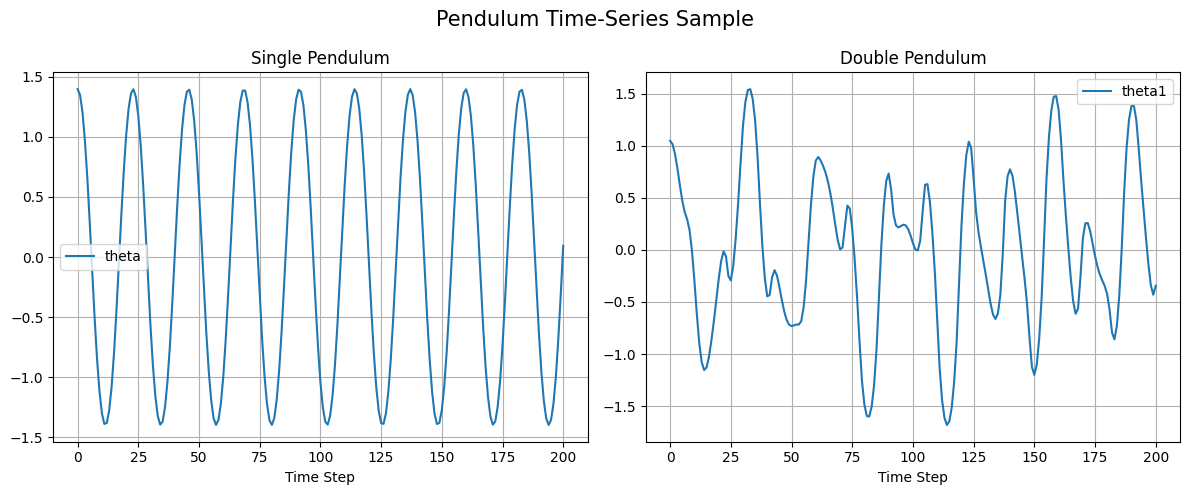

In [130]:
# data sample
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
map_generalized_coord_momenta = {
    "Single Pendulum": ["theta"],
    "Double Pendulum": ["theta1"],
}
for i, (k, v) in enumerate(map_generalized_coord_momenta.items()):
    ax = axes[i]
    df[v].loc[:200].plot(ax=ax)
    ax.grid()
    ax.set_title(k)
    ax.set_xlabel("Time Step")
fig.suptitle("Pendulum Time-Series Sample", size=15)
fig.tight_layout()
fig.savefig("fig/pendulum_data_sample1.png", dpi=200, facecolor="white")


In [28]:
N_train = int(df.shape[0] * 0.8)


# Theta ($\theta$) of Single Pendulum


In [122]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# for val in list_values:
list_df = []
for val in ["theta", "theta1"]:
    print(val)
    data_train, data_test = df[val].loc[:N_train], df[val].loc[N_train:]

    arima = ARIMA(data_train, order=(5, 0, 1))
    arima = arima.fit()

    sarimax = SARIMAX(data_train, order=(5, 0, 1), seasonal_order=(5, 0, 1, 10))
    sarimax = sarimax.fit()

    df_pred_arima = pd.DataFrame({val: arima.predict(start=0, end=df.index[-1])})
    df_pred_sarimax = pd.DataFrame({val: sarimax.predict(start=0, end=df.index[-1])})
    df_test_data = pd.DataFrame({val: df[val]})
    list_df.append(pd.concat([df_test_data, df_pred_arima, df_pred_sarimax]))

L = df.shape[0]
df_all = pd.concat(list_df, axis=1).assign(
    case=["test_data"] * L + ["ARIMA (5,0,1)"] * L + ["SARIMA (5,0,1) (5,0,1,10)"] * L
)


theta


/Users/yeo/.pyenv/versions/3.9.10/envs/research/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yeo/.pyenv/versions/3.9.10/envs/research/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yeo/.pyenv/versions/3.9.10/envs/research/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yeo/.pyenv/versions/3.9.10/envs/research/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Us

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.53153D+00    |proj g|=  1.67948D+04


 This problem is unconstrained.



At iterate    5    f= -5.51643D+00    |proj g|=  1.18777D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      6     38      1     0     0   1.188D+01  -5.516D+00
  F =  -5.5164328705722729     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


theta1


/Users/yeo/.pyenv/versions/3.9.10/envs/research/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yeo/.pyenv/versions/3.9.10/envs/research/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yeo/.pyenv/versions/3.9.10/envs/research/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yeo/.pyenv/versions/3.9.10/envs/research/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting par

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42565D+00    |proj g|=  8.91290D+01

At iterate    5    f= -9.49456D-01    |proj g|=  4.00047D+00

At iterate   10    f= -1.16498D+00    |proj g|=  3.92932D+00

At iterate   15    f= -1.24673D+00    |proj g|=  1.69647D+00

At iterate   20    f= -1.32286D+00    |proj g|=  7.09747D-01

At iterate   25    f= -1.37341D+00    |proj g|=  1.21151D+00

At iterate   30    f= -1.37747D+00    |proj g|=  7.05697D-02

At iterate   35    f= -1.38398D+00    |proj g|=  8.52033D-03

At iterate   40    f= -1.38409D+00    |proj g|=  6.54213D-03

At iterate   45    f= -1.38419D+00    |proj g|=  2.67506D-03


/Users/yeo/.pyenv/versions/3.9.10/envs/research/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.38420D+00    |proj g|=  2.72172D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     72      1     0     0   2.722D-02  -1.384D+00
  F =  -1.3842027217061665     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


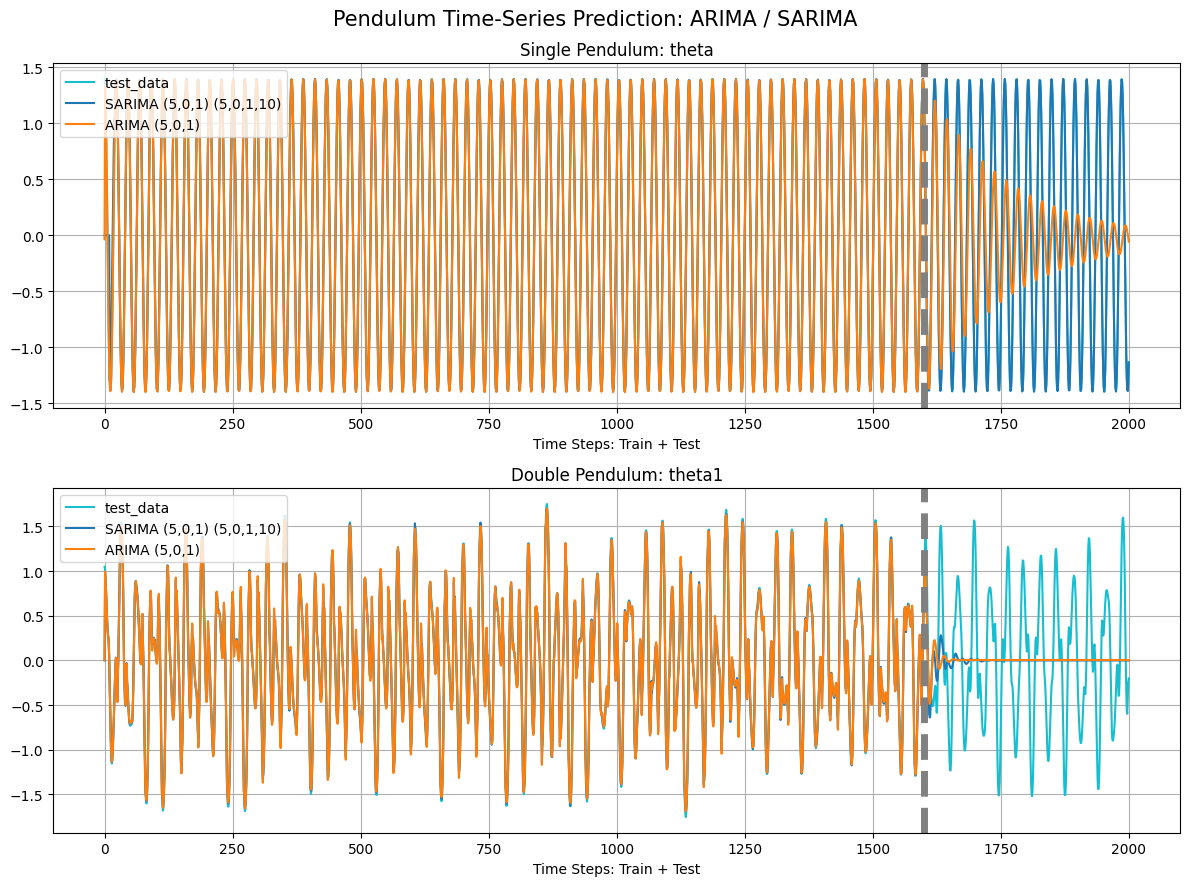

In [131]:
list_vals = ["theta", "theta1"]
list_title = ["Single Pendulum: theta", "Double Pendulum: theta1"]
cmap = sns.color_palette("tab10")
fig, axes = plt.subplots(2, 1, figsize=(12, 9))
for i, ax in enumerate(
    axes.reshape(
        2,
    )
):
    df_plot = df_all.reset_index().pivot_table(
        index="index", values=list_vals[i], columns="case"
    )
    df_plot = df_plot[["test_data", "SARIMA (5,0,1) (5,0,1,10)", "ARIMA (5,0,1)"]]
    df_plot.plot(ax=ax, color=[cmap[-1], cmap[0], cmap[1]])
    ax.axvline(x=1600, color="gray", linestyle="--", linewidth=5)
    ax.set_xlabel("Time Steps: Train + Test")
    ax.set_title(list_title[i], size=12)
    ax.legend(loc="upper left")
    ax.grid()
fig.suptitle("Pendulum Time-Series Prediction: ARIMA / SARIMA", size=15)
fig.tight_layout()
fig.savefig("fig/pendulum_arima.png", dpi=200, facecolor="white")


# Searching for Best SARIMA


In [112]:
ps = [4, 5]
ds = [0, 1]
qs = [1, 2]
Ps = [4, 5]
Ds = [0, 1]
Qs = [1, 2]
Ss = [10]
from itertools import product

parameters = product(ps, ds, qs, Ps, Ds, Qs, Ss)
parameters_list = list(parameters)
len(parameters_list)


64

In [9]:
def grid_search_arima(series, parameters_list, opt_method="powell"):
    """
    Return dataframe with parameters and corresponding AIC, and the best model according to AIC
    """

    results = []
    best_aic = float("inf")

    for param in parameters_list:
        [p, d, q, P, D, Q, s] = param
        # we need try-except because on some combinations model might fail to converge
        try:
            model = SARIMAX(series, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit(
                method=opt_method, disp=False
            )
        except:
            continue

        aic = model.aic
        if aic < best_aic:
            best_model = model
            best_aic = aic
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ["parameters", "aic"]
    result_table = result_table.sort_values(by="aic", ascending=True).reset_index(
        drop=True
    )

    return result_table, best_model


In [11]:
result_table, best_model = grid_search_arima(
    df["theta1"].loc[:N_train], parameters_list
)


/Users/yeo/.pyenv/versions/3.9.10/envs/research/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yeo/.pyenv/versions/3.9.10/envs/research/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/yeo/.pyenv/versions/3.9.10/envs/research/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/yeo/.pyenv/versions/3.9.10/envs/research/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as 

In [14]:
best_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             theta1   No. Observations:                 1601
Model:             SARIMAX(4, 0, 2)x(5, 0, 2, 10)   Log Likelihood                2228.441
Date:                            Thu, 15 Jun 2023   AIC                          -4428.883
Time:                                    19:48:41   BIC                          -4353.585
Sample:                                         0   HQIC                         -4400.923
                                           - 1601                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.9807      0.042     70.904      0.000       2.898       3.063
ar.L2         -3.3171      0.117    -28.285      0.000      -3.547      -3.087
ar.L3          1.5923      0.119     13.412      0.000       1.360       1.825
ar.L4         -0.2625      0.043     -6.121      0.000      -0.347      -0.178
ma.L1         -0.4268      0.041    -10.340      0.000      -0.508      -0.346
ma.L2         -0.5162      0.041    -12.513      0.000      -0.597      -0.435
ar.S.L10       1.0110      0.053     18.955      0.000       0.906       1.115
ar.S.L20      -1.0282      0.065    -15.733      0.000      -1.156      -0.900
ar.S.L30       0.2352      0.047      5.011      0.000       0.143       0.327
ar.S.L40      -0.2132      0.044     -4.898      0.000      -0.298      -0.128
ar.S.L50       0.0593      0.028      2.083      0.037       0.004       0.115
ma.S.L10      -1.0519      0.044    -24.003      0.000      -1.138      -0.966
ma.S.L20       0.9217      0.050     18.591      0.000       0.824       1.019
sigma2         0.0036      0.000     30.615      0.000       0.003       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               184.34
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.08
Prob(H) (two-sided):                  0.56   Kurtosis:                         4.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

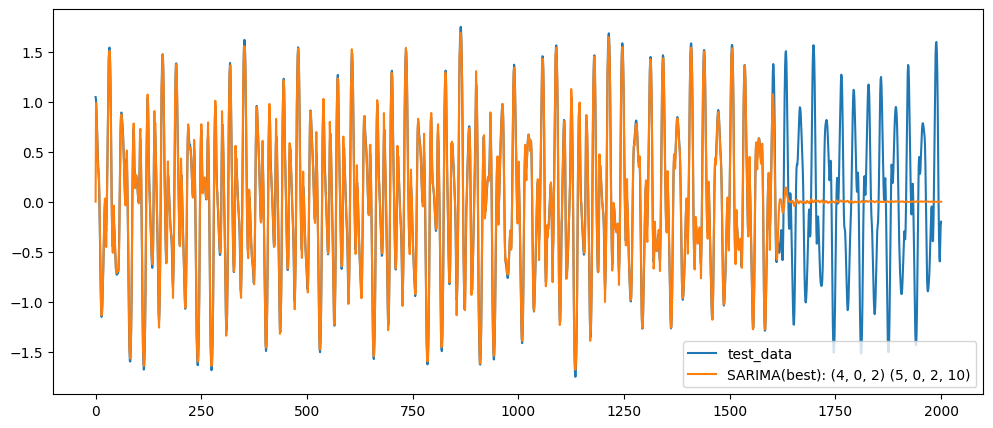

In [124]:
df_plot = pd.DataFrame(
    {
        "test_data": df["theta1"],
        "SARIMA(best): (4, 0, 2) (5, 0, 2, 10)": best_model.predict(
            start=0, end=df.index[-1]
        ),
    }
)
df_plot.plot(figsize=(12, 5))